In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model 
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler 
import numpy as np

In [2]:
df = pd.read_csv('Final/Suicide_Final_Avg.csv')
df

,LocationTime,Suicide_Val_TOT,Alcohol_Val,Edu_Sec_Val,Edu_Try_Val,Emp_Val,Healthy_Spend_Val,Obesity_Val,Smoking_Val,Soc_Spend_Val,Work_Hour_Val
0,ARG-1990,9.3,9.5,52.0,31.3,84.0,25.8,34.3,20.4,3.7,1854.0
1,ARG-1991,8.2,8.4,53.6,30.8,84.0,26.1,61.8,13.4,3.7,1845.6
2,ARG-1992,9.0,8.2,61.8,33.0,86.7,25.5,59.4,12.1,2.0,1855.7
3,ARG-1993,9.3,7.5,59.4,33.7,87.2,24.6,45.8,11.3,1.9,1874.2
4,ARG-1994,8.7,10.0,45.8,36.1,87.5,24.3,52.3,10.8,1.9,1870.3
...,...,...,...,...,...,...,...,...,...,...,...
1326,ZAF-2014,1.2,7.2,59.5,12.8,81.7,29.2,64.0,26.0,12.1,1778.4
1327,ZAF-2015,1.0,7.2,59.4,13.0,81.3,29.0,71.0,26.0,12.2,1777.6
1328,ZAF-2016,0.8,7.3,58.2,13.8,79.5,29.1,65.7,20.4,12.5,1781.6
1329,ZAF-2017,0.7,7.3,55.9,15.5,78.7,28.9,66.2,20.4,12.6,1777.2


In [3]:
# Spliting target variable and independent variables
X = df.drop(['Suicide_Val_TOT', 'LocationTime'], axis = 1).values.reshape(-1, 9)
y = df['Suicide_Val_TOT']

In [4]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size = 0.3, random_state = 100)

In [5]:
# Create a StandardScaler instance
scaler = StandardScaler()
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
#Linear Regression
model= LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [7]:
X_train_scaled

array([[ 1.29347608, -1.28135562,  0.93499007, ...,  0.83237953,
         1.65823335,  1.02153054],
       [ 0.2776662 , -0.64351696,  1.69872396, ..., -1.3947776 ,
         0.03492294, -0.13055893],
       [ 1.62115669,  0.54026836, -0.40154425, ..., -0.01032857,
        -0.3650231 ,  0.67426121],
       ...,
       [ 0.67088293, -1.1840582 , -1.20547466, ...,  0.35083204,
        -0.64733795,  0.18198347],
       [ 0.80195517, -0.62730072,  0.11096139, ..., -0.01032857,
        -0.31797062, -0.94945756],
       [-0.4759992 , -0.30297598,  1.17616919, ...,  0.50131563,
        -0.20033943,  0.11863028]])

In [8]:
# Adding constant
X_train_scaled = sm.add_constant(X_train_scaled)

In [9]:
#Running model 
lm = sm.OLS(y_train,X_train_scaled).fit()

In [10]:
#Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicide_Val_TOT   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     54.02
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           7.68e-79
Time:                        13:53:09   Log-Likelihood:                -3113.5
No. Observations:                 931   AIC:                             6247.
Df Residuals:                     921   BIC:                             6295.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9855      0.226     61.893      0.0

In [11]:
y_pred = model.predict(X_test_scaled) 
y_pred

array([ 1.30722553e+01,  2.06298977e+01,  1.25522966e+01,  6.85416530e+00,
        3.76218158e+00,  1.76728578e+01,  1.56891915e+01,  1.34438209e+01,
        1.26045145e+01,  1.31057300e+01,  1.65853584e+01,  1.54420117e+01,
        1.10119845e+01,  1.63658204e+01,  2.46981189e+01,  7.26967311e+00,
        1.76984835e+01,  1.67337081e+01,  9.26107104e+00,  7.88597660e+00,
        9.40929737e+00,  3.87448686e+00,  1.53778695e+01,  9.15696513e+00,
        2.01742929e+01,  1.28944666e+01,  1.45940574e+01,  9.20673915e+00,
        1.64776715e+01,  1.72023099e+01,  3.21241806e+01,  1.43645564e+01,
        1.75646208e+01,  1.07681462e+01,  1.05703090e+01,  1.56013775e+01,
        1.35156871e+01,  1.43207815e+01,  9.85389039e+00,  5.12195070e+00,
        1.36467422e+01,  1.92158108e+01,  1.80117559e+01,  7.55368260e+00,
        1.67543036e+01,  5.17014459e+00,  1.38840504e+01,  1.43193184e+01,
        1.95754035e+01,  9.11869130e+00,  1.01214036e+01,  1.02156526e+01,
        1.46580785e+01,  

In [12]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.2907912618869667

In [13]:
pred_y_df=pd.DataFrame({"Actual Value":y_test, "Predicted Value":y_pred, "Difference":y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
560,7.0,13.072255,-6.072255
1208,31.0,20.629898,10.370102
222,19.7,12.552297,7.147703
315,8.7,6.854165,1.845835
731,7.3,3.762182,3.537818
888,10.5,17.672858,-7.172858
139,11.0,15.689191,-4.689191
459,39.4,13.443821,25.956179
256,11.9,12.604515,-0.704515
238,11.1,13.105730,-2.005730


Text(0, 0.5, 'Predicted')

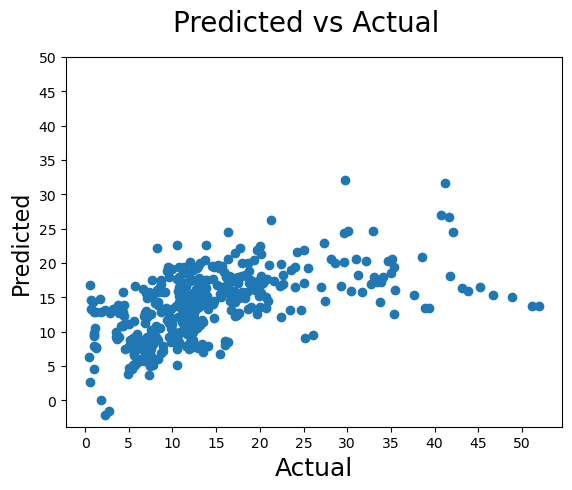

In [14]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred) 
plt.yticks(np.arange(0, 51, step=5)) 
plt.xticks(np.arange(0,51, step=5))
fig.suptitle('Predicted vs Actual', fontsize=20)              
plt.xlabel('Actual', fontsize=18)                          
plt.ylabel('Predicted', fontsize=16)  